In [9]:
#imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt


# for 2-D plot
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams["font.family"] = 'DejaVu Sans'
plt.rcParams["font.size"] = '12'

In [7]:
dataset = pd.read_csv('../data/chocolate_mutliLinear_data.txt', index_col=False, sep="\t",header=0)
print(dataset.head())

weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


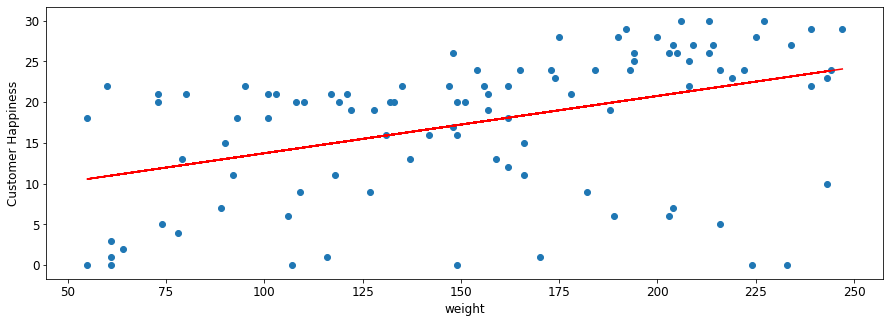

In [19]:
formula = 'customer_happiness ~ weight'
lm = smf.ols(formula=formula,data = dataset).fit()
featureName = formula.split(" ")[-1]
x = dataset[featureName]

intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
plt.plot(x, line, '-', c = 'red')
plt.scatter(x, dataset.customer_happiness)
plt.ylabel('Customer Happiness')
plt.xlabel(featureName)
graph.show()


In [20]:
print(lm.rsquared)

0.18877012340221233


In [22]:
#multilinear
formula = 'customer_happiness ~ weight+ cocoa_percent + cost'
lm = smf.ols(formula=formula,data = dataset).fit()
print(lm.rsquared)
print("R²: " + str(lm.rsquared))

0.55541565577131
R²: 0.55541565577131


In [29]:
# 3D plot
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def CalculateCustomerHappiness(weight, cocoa_percent):
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
    
    ### 
    # REPLACE THE <addThirdCoefHere> AND <addFourthCoefHere> BELOW WITH THE THIRD AND FOURTH COEFFICIENTS
    # YOU'LL FIND THEM JUST ABOVE THESE COMMENTS!
    # THE FIRST TWO HAVE ALREADY BEEN COMPLETED FOR YOU
    ###
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness

    def Graph3d():
        # This creates a 3D graph of likely customer happiness with different types of chocolate bar
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        cocoaPercentages=range(0,100,5)
        for weight in range(50,250,5):
            happiness=[]
            for cocoa in cocoaPercentages:
                happiness.append(CalculateCustomerHappiness(weight,cocoa))

            ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

        ax.set_xlabel('Chocolate Bar Weight')
        ax.set_ylabel('Cocoa %')
        ax.set_zlabel('Customer happiness')

        plt.show()
Graph3d()

NameError: name 'Graph3d' is not defined

NameError: name 'Graph3d' is not defined